<a href="https://colab.research.google.com/github/roy-sub/CryptoAnalysis/blob/main/Cryptocurrency%20Price%20Prediction/Bitcoin/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Installing the Necessary Packages**

In [ ]:
! pip3 install yfinance

#**Importing the Necessary Packages**

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

#**Downloading the Dataset**


In [4]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


#**Plotting Stock Closing Prices Over Time**

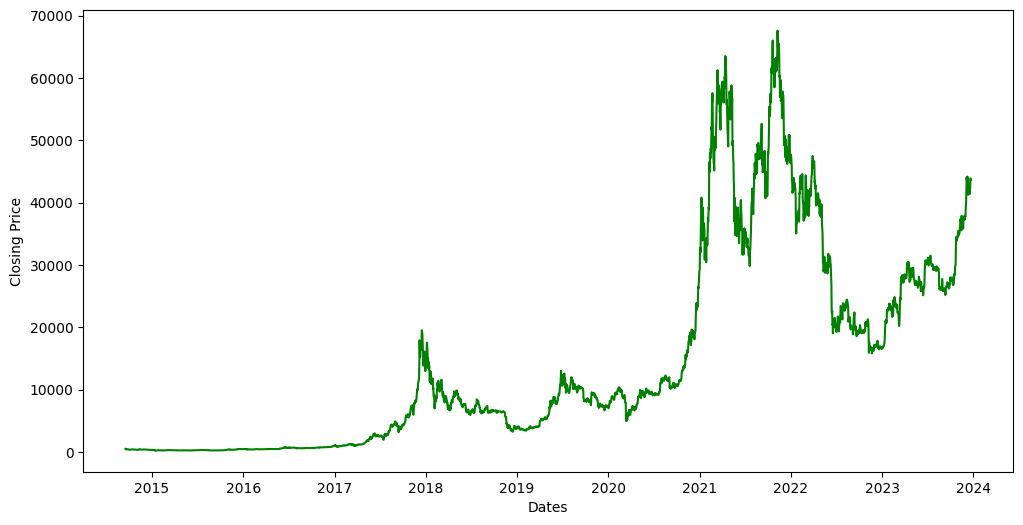

In [7]:
plt.figure(figsize=(12,6))
plt.xlabel("Dates")
plt.ylabel("Closing Price")
plt.plot(df.index, df['Adj Close'], color='green')
plt.show()

#**Preparing Training and Testing Data**

In [8]:
to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

print(f"training_data : {len(training_data)} \ntesting_data : {len(testing_data)}")

training_data : 3045 
testing_data : 339


#**Visualizing Training and Testing Data Split**

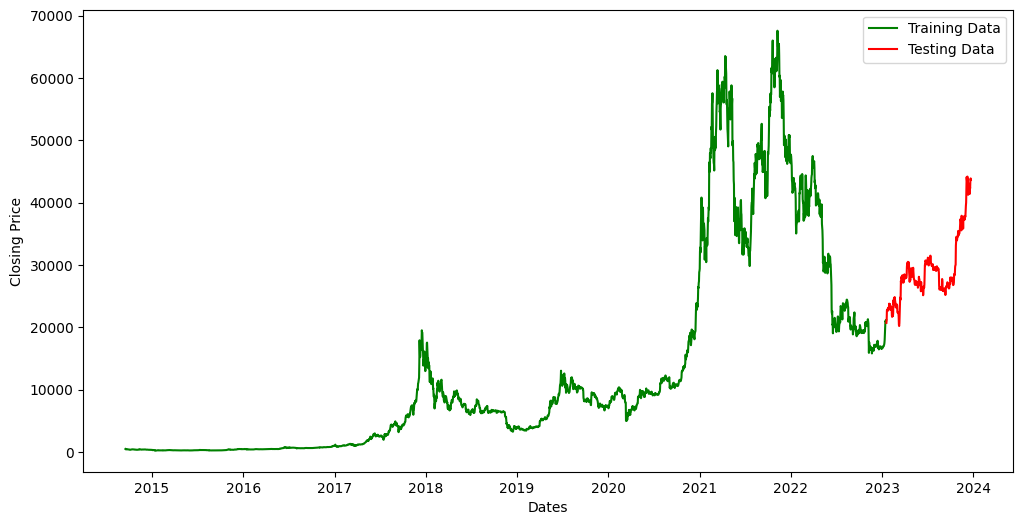

In [10]:
plt.figure(figsize=(12,6))
plt.xlabel("Dates")
plt.ylabel("Closing Price")
plt.plot(df[0:to_row]['Adj Close'], "green", label = "Training Data")
plt.plot(df[to_row:]['Adj Close'], "red", label = "Testing Data")
plt.legend()
plt.show()

#**ARIMA Model Development**

In [13]:
model_prediction = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
  model = ARIMA(training_data, order=(4, 1, 0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  model_prediction.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3383
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -27323.958
Date:                Fri, 22 Dec 2023   AIC                          54657.915
Time:                        12:38:04   BIC                          54688.547
Sample:                             0   HQIC                         54668.866
                               - 3383                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0259      0.009     -2.866      0.004      -0.044      -0.008
ar.L2          0.0097      0.009      1.122      0.262      -0.007       0.027
ar.L3          0.0214      0.009      2.291      0.0

#**Plotting the Comparison of BTC Price: Actual vs Predicted**

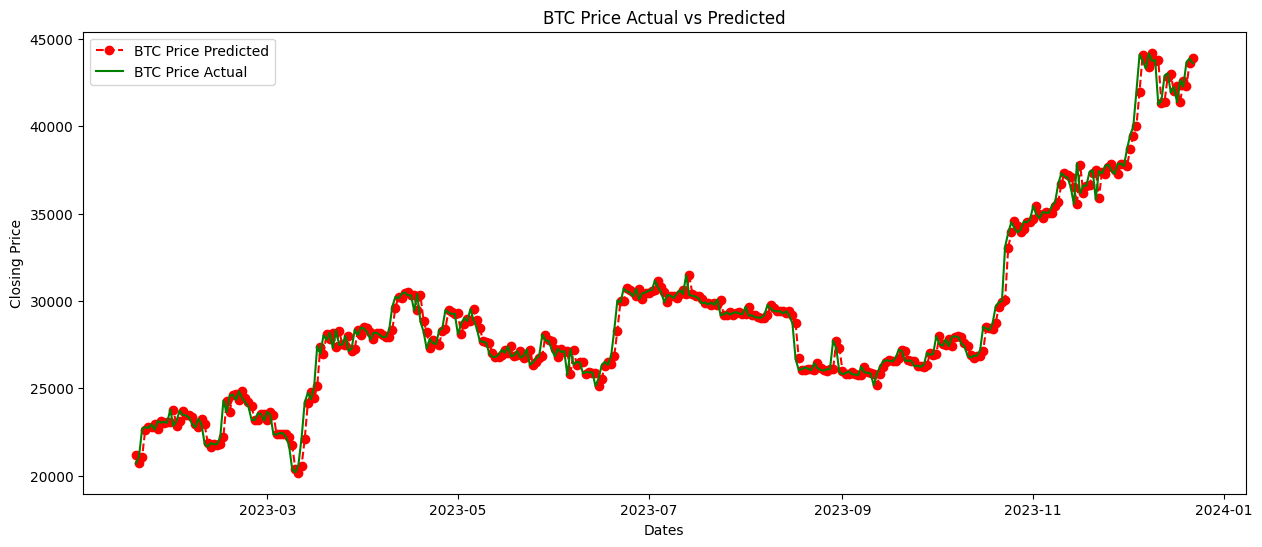

In [15]:
plt.figure(figsize=(15,6))
date_range = df[to_row:].index
plt.plot(date_range, model_prediction, color = 'red', marker = 'o', linestyle = 'dashed', label = 'BTC Price Predicted')
plt.plot(date_range, testing_data, color = 'green', label = 'BTC Price Actual')
plt.title('BTC Price Actual vs Predicted')
plt.xlabel("Dates")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

#**Mean Absolute Percentage Error (MAPE) Calculation**

In [16]:
mape = np.mean(np.abs(np.array(model_prediction)-np.array(testing_data))/np.abs(testing_data))
print(f"MAPE : {mape}")

MAPE : 0.015259437106905525
